# Imports necessários

## Bibliotecas

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

import statistics as st
import sys
import math
import pandas as pd
import numpy as np
sys.path.insert(1, '..\Modelo')


## Importando o modelo

In [ ]:
from ePL_KRLS_DISCO import ePL_KRLS_DISCO

## Importando a série

In [ ]:
df = pd.read_csv("../Dados/Dados refinados/timeseries.csv", index_col= 0)

In [11]:
df

,mes,dia,hora,QTD_VEICULOS_USINA,primeira_quinzena,feriado,fim_semana,TPV
0,1,2,7,1,1,0,1,2.220000
1,1,2,8,1,1,0,1,0.000000
2,1,2,8,0,1,0,1,2.605000
3,1,2,9,1,1,0,1,0.000000
4,1,2,9,1,1,0,1,0.000000
...,...,...,...,...,...,...,...,...
13035,9,30,21,3,0,0,0,4.306490
13036,9,30,21,3,0,0,0,0.000000
13037,9,30,22,2,0,0,0,4.378044
13038,9,30,22,1,0,0,0,4.419491


# Transformação de dados

## Normalizando os dados

In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df_normalized

,mes,dia,hora,QTD_VEICULOS_USINA,primeira_quinzena,feriado,fim_semana,TPV
0,0.0,0.033333,0.304348,0.011628,1.0,0.0,1.0,0.097668
1,0.0,0.033333,0.347826,0.011628,1.0,0.0,1.0,0.000000
2,0.0,0.033333,0.347826,0.000000,1.0,0.0,1.0,0.114606
3,0.0,0.033333,0.391304,0.011628,1.0,0.0,1.0,0.000000
4,0.0,0.033333,0.391304,0.011628,1.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...
13035,1.0,0.966667,0.913043,0.034884,0.0,0.0,0.0,0.189463
13036,1.0,0.966667,0.913043,0.034884,0.0,0.0,0.0,0.000000
13037,1.0,0.966667,0.956522,0.023256,0.0,0.0,0.0,0.192611
13038,1.0,0.966667,0.956522,0.011628,0.0,0.0,0.0,0.194434


# Modelagem


## ePL_KRLS_DISCO()

In [ ]:
model = ePL_KRLS_DISCO()
Data = df_normalized.to_numpy()

test_size = 0.2
split_index = int(len(df) * (1 - test_size))

# Separating the inputs and output
X = Data[:, :-1]
y = Data[:, -1]


X_train = X[:split_index, :]
y_train = y[:split_index]

X_test = X[split_index:, :]
y_test = y[split_index:]


In [10]:

# Training the model
OutputTraining, Rules = model.fit(X_train, y_train)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10432, 7), (10432,), (2608, 7), (2608,))

In [12]:
OutputTest = model.predict(X_test)

In [13]:
len(OutputTest)


2608

In [45]:
df_normalized.columns

Index(['mes', 'dia', 'hora', 'QTD_VEICULOS_USINA', 'primeira_quinzena',
       'feriado', 'fim_semana', 'TPV'],
      dtype='object')

In [52]:
tmp = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis= 1)
tmp.columns = df_normalized.columns
tmp2 = pd.DataFrame(scaler.inverse_transform(tmp))
tmp2.columns = df_normalized.columns
tmp2

,mes,dia,hora,QTD_VEICULOS_USINA,primeira_quinzena,feriado,fim_semana,TPV
0,8.0,7.0,15.0,23.0,1.0,0.0,1.0,3.770434
1,8.0,7.0,16.0,20.0,1.0,0.0,1.0,3.790079
2,8.0,7.0,16.0,21.0,1.0,0.0,1.0,3.906266
3,8.0,7.0,17.0,20.0,1.0,0.0,1.0,3.940223
4,8.0,7.0,17.0,19.0,1.0,0.0,1.0,4.124344
...,...,...,...,...,...,...,...,...
2603,9.0,30.0,21.0,3.0,0.0,0.0,0.0,4.306490
2604,9.0,30.0,21.0,3.0,0.0,0.0,0.0,0.000000
2605,9.0,30.0,22.0,2.0,0.0,0.0,0.0,4.378044
2606,9.0,30.0,22.0,1.0,0.0,0.0,0.0,4.419491


In [35]:
scaler.inverse_transform(X_test)

ValueError: operands could not be broadcast together with shapes (2608,7) (8,) (2608,7) 

In [24]:
tmp = pd.DataFrame(X_test)
tmp["TPV"] = OutputTest

tmp.columns = df_normalized.columns
df_denormalized = pd.DataFrame(scaler.inverse_transform(tmp), columns=df_normalized.columns)
df_denormalized

,mes,dia,hora,QTD_VEICULOS_USINA,primeira_quinzena,feriado,fim_semana,TPV
0,8.0,7.0,15.0,23.0,1.0,0.0,1.0,0.001059
1,8.0,7.0,16.0,20.0,1.0,0.0,1.0,2.827914
2,8.0,7.0,16.0,21.0,1.0,0.0,1.0,2.433638
3,8.0,7.0,17.0,20.0,1.0,0.0,1.0,3.820239
4,8.0,7.0,17.0,19.0,1.0,0.0,1.0,4.133496
...,...,...,...,...,...,...,...,...
2603,9.0,30.0,21.0,3.0,0.0,0.0,0.0,133.805856
2604,9.0,30.0,21.0,3.0,0.0,0.0,0.0,133.805856
2605,9.0,30.0,22.0,2.0,0.0,0.0,0.0,141.465350
2606,9.0,30.0,22.0,1.0,0.0,0.0,0.0,153.608138


In [30]:
array(df_denormalized.TPV)

NameError: name 'array' is not defined

In [32]:
RMSE = math.sqrt(mean_squared_error(y_test, df_denormalized.TPV))
# Compute the Non-Dimensional Error Index
NDEI= RMSE/st.stdev(y_test.flatten())
# Compute the Mean Absolute Error
MAE = mean_absolute_error(y_test, df_denormalized.TPV)


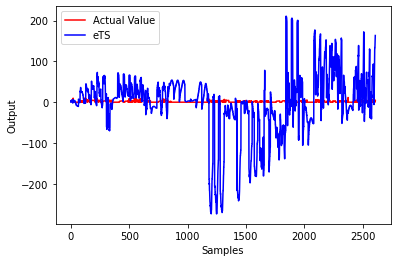

In [53]:
# Plot the graphic of the actual time series and the eTS predictions
plt.plot(tmp2.TPV, label='Actual Value', color='red')
plt.plot(df_denormalized.TPV, color='blue', label='eTS')
plt.ylabel('Output')
plt.xlabel('Samples')
plt.legend()
plt.show()

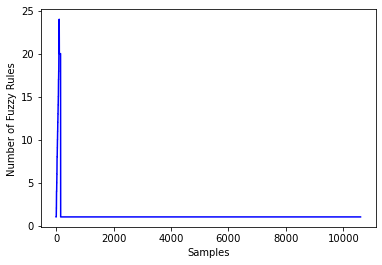

In [93]:
# Plot the evolution of the model's rule
plt.plot(Rules, color='blue')
plt.ylabel('Number of Fuzzy Rules')
plt.xlabel('Samples')
plt.show()

## Pycaret


In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from pycaret.time_series import *

In [ ]:
s = setup(df, fh = y_test.shape[0], session_id = 123, target = "TPV")

In [ ]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,13040.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,0.120463
3,Summary,Statistics,Transformed,Median,,0.124766
4,Summary,Statistics,Transformed,Standard Deviation,,0.123867
5,Summary,Statistics,Transformed,Variance,,0.015343
6,Summary,Statistics,Transformed,Kurtosis,,-0.040004
7,Summary,Statistics,Transformed,Skewness,,0.663198
8,Summary,Statistics,Transformed,# Distinct Values,,7246.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",45177.006922


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:06:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,1.3209,1.1162,0.1358,0.1730,213788001206938.1562,1.3843,-0.9397,98.5167


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 